<a href="https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Explainable-AI-II/blob/main/AIPI_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06
### Description

This project explores **Explainable AI (XAI)** techniques to interpret a machine learning model trained on the **California Housing dataset**. It involves creating **Partial Dependence Plots (PDP)**, **Individual Conditional Expectation (ICE) plots**, and **Accumulated Local Effects (ALE) plots** to visualize the impact of key features like median income on house prices. The project also includes **permutation feature importance** to identify the most influential features and performs model evaluation with metrics such as **R²** and **Mean Squared Error (MSE)** to assess model performance and interpretability.
### Yufan Ai

#### Include the button below. Change the link to the location in your github repository:
#### https://github.com/aiyufan3/AIPI-XAI-Explainable-AI-II

## DO:
For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features.  



Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.


In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


# Install and Import Libraries

In [2]:
# Install libraries
!pip install numpy pandas matplotlib scikit-learn shap xgboost git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from alepython import ale_plot
from sklearn.inspection import permutation_importance

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-x61xlnjo/alepython_caff1e69995b4d61ab250ca6f7bee59f
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-x61xlnjo/alepython_caff1e69995b4d61ab250ca6f7bee59f
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.8 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=a2e7b1df8233404bc5a8a981718bc3c853a8ceda95039584462434e4540610ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-ne7omr5h/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


# Load Dataset and Prepare for Modeling

In [3]:
# Load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Exploratory Data Analysis (EDA) and Correlation Analysis

### **Exploratory Data Analysis (EDA) and Correlation Analysis**

Before building the model, we performed an **Exploratory Data Analysis (EDA)** to understand the structure of the **California Housing dataset**. This included examining summary statistics and plotting a **correlation matrix** to identify relationships between features.

Key insights from the correlation matrix:
- **Strong correlation** between **Average Rooms** and **Average Bedrooms** (0.85), indicating that homes with more rooms tend to have more bedrooms.
- **Moderate correlation** between **Median Income** and **AveRooms** (0.33), suggesting wealthier neighborhoods generally have larger homes.
- **Latitude** and **Longitude** are **strongly negatively correlated** (-0.92), reflecting geographical trends in California.


In [6]:
# Exploratory Data Analysis (EDA)
correlation_matrix = X.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0

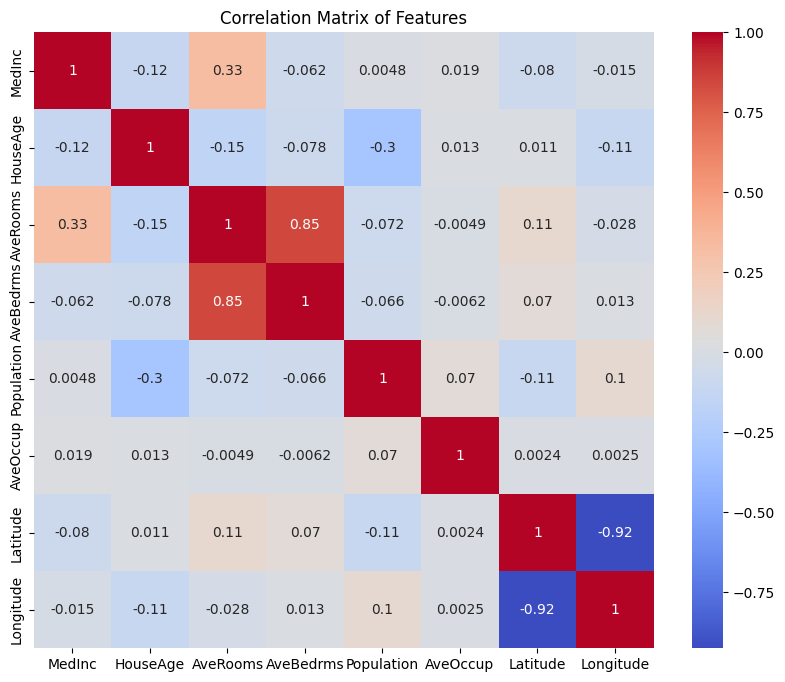

In [7]:
# Correlation Matrix Heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## **Exploratory Data Analysis (Correlation Matrix)**
The **correlation matrix** shows the relationships between different features in the dataset. Notable correlations include:
- A strong correlation between **Average Rooms (AveRooms)** and **Average Bedrooms (AveBedrms)** (0.85), indicating that homes with more rooms tend to have more bedrooms. This might reflect the overall size of the home.
- A moderate correlation (0.33) between **Median Income (MedInc)** and **Average Rooms** suggests that wealthier neighborhoods tend to have larger homes.
- **Latitude** and **Longitude** are negatively correlated (-0.92), indicating geographical tendencies across California.

These correlations can affect model interpretations, especially when exploring feature interactions in models like Random Forest.

# Partial Dependence Plot (PDP)

A Partial Dependence Plot (PDP or PD) shows the marginal effect one or two features have on the predicted outcome of a model [Paper, 2001](https://jerryfriedman.su.domains/ftp/trebst.pdf)

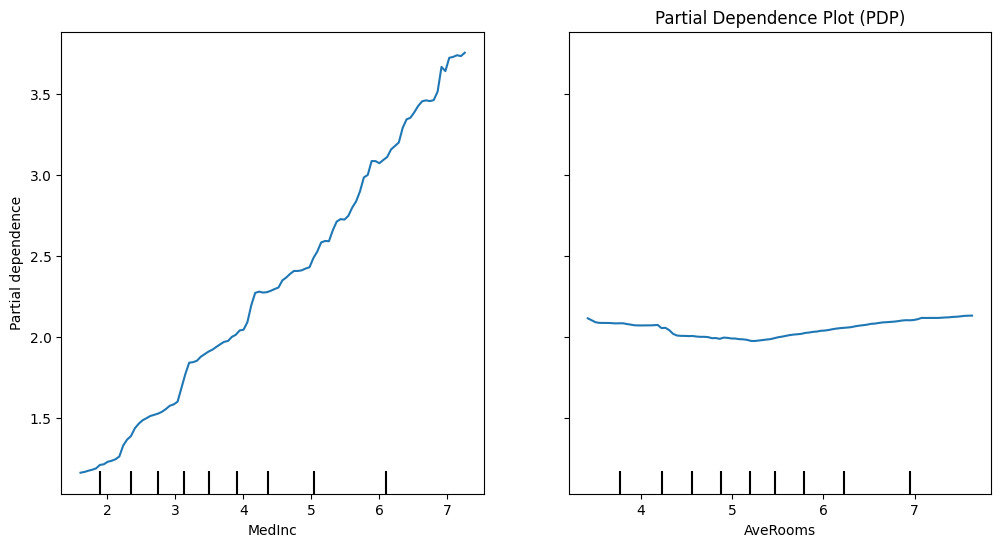

In [8]:
features = ['MedInc', 'AveRooms']  # Selected features for visualization

# PDP plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_test, features, kind="average", ax=ax)
plt.title('Partial Dependence Plot (PDP)')
plt.show()

- **PDP (Partial Dependence Plot)**:
    - The plot for **Median Income (MedInc)** shows a strong positive relationship with housing prices, meaning as income increases, so do the house prices, which is intuitive.
    - The **AveRooms** plot is nearly flat, indicating that the number of rooms does not significantly influence the house prices after controlling for other factors in the model.

# Individual Conditional Expectation (ICE) Plot

Individual Conditional Expectation (ICE) plots one line per instance that displays how the instance’s prediction changes when a feature changes [Paper, 2014](https://arxiv.org/pdf/1309.6392)

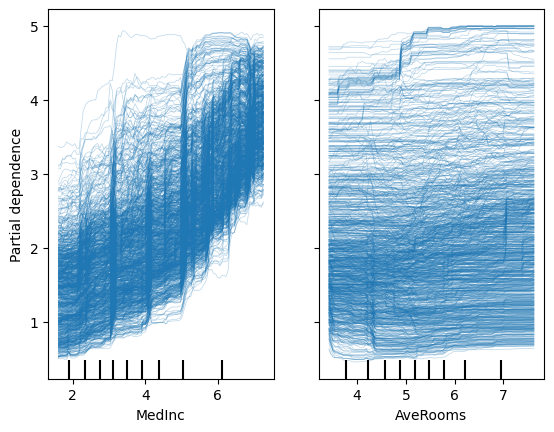

In [9]:
features = ['MedInc', 'AveRooms']  # Selected features for visualization

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual') #kind='individual'

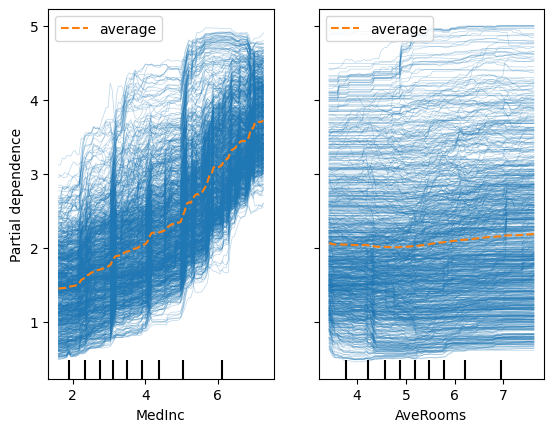

In [10]:
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both') #kind='both'

- **ICE (Individual Conditional Expectation) Plots**:
    - For **MedInc**, individual data points show varying levels of sensitivity to income, but the general upward trend is preserved, aligning with the PDP. However, the variability seen in the ICE plot reflects differences between neighborhoods or instances.
    - **AveRooms** shows more variance, suggesting complex interactions at an individual level, even though the PDP shows no significant global effect.

# Accumulated Local Effects (ALE) Plot

The **ALE plot** for **MedInc** further confirms a strong positive relationship, but unlike PDP, it focuses on local feature contributions. It reveals that at lower income levels, changes in income have a smaller effect, while higher income levels see a sharper increase in predicted prices. The ALE is robust to correlated features and highlights localized effects of `MedInc` more clearly.

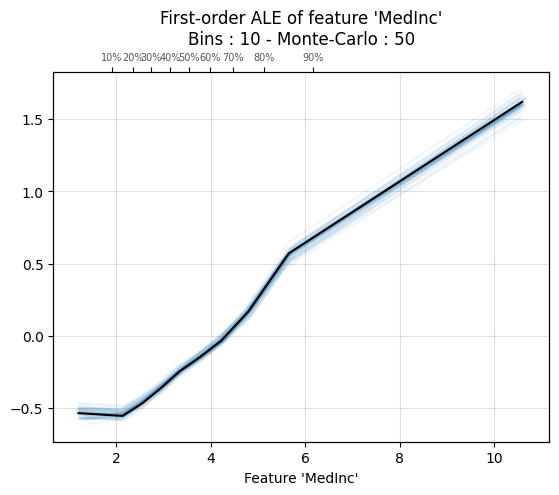

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'MedInc'">

In [11]:
# ALE plots
ale_plot(model, X_train, 'MedInc', monte_carlo=True)

##Interpret 1D Main Effect ALE Plot
* X-axis represents feature values
* Y-axis shows average effect on predictions
* Each curve represents a feature's ALE. - Flat curves imply little impact; steep curves, significant impact
* Upward curves: increasing feature value increases predictions; downward, the opposite
* Steeper curves signify larger effects

We can compare ALE plots to gauge relative feature importance. Features with steeper curves have larger impacts.

This plot visualizes the **Accumulated Local Effects (ALE)** of the feature **Median Income (MedInc)** on housing prices. The x-axis represents the median income of neighborhoods, while the y-axis shows the accumulated effect on the model’s prediction.

- **Interpretation**: The plot shows a **positive relationship** between median income and housing prices. Initially, as income increases, the effect on the house price is modest, but once income surpasses approximately 6, the effect becomes more pronounced, indicating that higher-income areas see sharper increases in housing prices.
- **Local vs. Global Effect**: ALE captures localized effects rather than global trends. The small dip below zero at lower income levels reflects that in some low-income areas, the predicted prices are slightly reduced, but this reverses quickly as income rises.

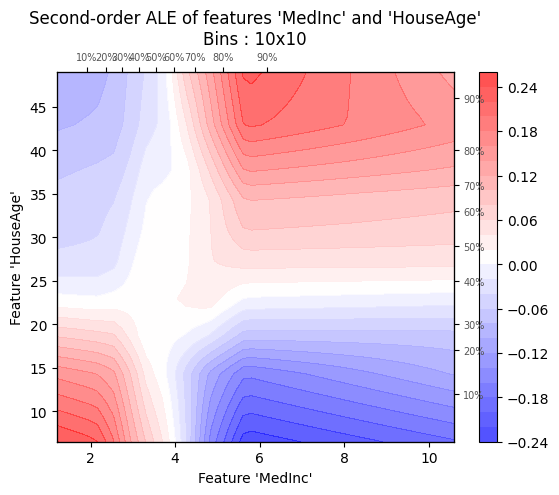

<Axes: title={'center': "Second-order ALE of features 'MedInc' and 'HouseAge'\nBins : 10x10"}, xlabel="Feature 'MedInc'", ylabel="Feature 'HouseAge'">

In [12]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, X_train.columns[:2], bins=10)

## Interpret - 2D Second-Order ALE Plot

* Both axes represent the values of the two features being analyzed.
* Each axis corresponds to one of the features.
* The plot displays a surface where the height represents the average effect on predictions. Higher points indicate regions where the model tends to make higher predictions, and vice versa.
* Patterns in the surface reveal how the joint behavior of the two features affects the model's predictions. Peaks or valleys suggest regions where the joint effect is particularly strong.
* The direction of the slope indicates whether increasing one feature while holding the other constant tends to increase or decrease predictions. Steeper slopes represent larger effects, while flatter regions indicate smaller effects.


We can compare the 2D Second-Order ALE Plot with individual ALE plots for each feature to understand how joint effects differ from marginal effects.

This second-order ALE plot shows the **interaction effects** between **Median Income (MedInc)** and **House Age** on house prices. The x-axis represents `MedInc`, and the y-axis represents `HouseAge`, with color indicating the interaction's effect (red = positive, blue = negative).

- **Interpretation**:
  - **House Age** and **MedInc** have an interactive effect on predictions. For **newer houses** (lower on the y-axis), higher income neighborhoods have a stronger positive influence on house prices (red zone).
  - **Older houses** (higher y-axis) show a more mixed effect. Even in higher-income areas, house age moderates the positive impact of income, likely reflecting that newer properties in wealthy areas are priced higher.
  
- **Insights**: This plot indicates that in wealthier areas, house age becomes an important determinant of house prices. For older houses in higher-income areas, prices rise slower compared to newer ones, illustrating how feature interactions affect predictions.

# **Comparison of PDP and ALE**

#### **PDP (Partial Dependence Plot)**
- **Global view**: The PDP provides a global understanding of how a single feature affects the prediction, averaged across all instances. It shows a smooth, increasing trend for **Median Income (MedInc)**, indicating that higher incomes generally lead to higher house prices.
- **Insights**: PDP smooths out interactions and correlations, offering a clean look at the general relationship between features and predictions.

#### **ALE (Accumulated Local Effects)**
- **Local and interaction-aware**: ALE focuses on local contributions of a feature to the prediction, accounting for interactions between features. In the **ALE plot**, the relationship between income and prices is also positive, but it shows finer details—such as smaller changes at lower income levels and more rapid increases after an income threshold. The **second-order ALE** plot captures the interaction between **MedInc** and **HouseAge**, revealing nuanced relationships between features (e.g., newer houses in higher-income areas exhibit higher prices).

#### **Key Differences**:
- **PDP** does not account for correlations between features, meaning it may overestimate or underestimate a feature’s true effect. It provides a simplified global view.
- **ALE**, on the other hand, corrects for feature dependencies by calculating effects within local intervals, offering a more accurate interpretation, especially in datasets with correlated features (like **AveRooms** and **AveBedrms** in the dataset).

**PDP** for `MedInc` shows an overall smooth positive trend, while **ALE** highlights more localized variations, especially where low incomes have little impact on prices, but prices rise sharply after `MedInc > 6`.

# Permutation Feature Importance

The importance of a feature can be measured by calculating how much model’s prediction error increases after permuting the feature.
* If shuffling a feature’s values increases the model error, the feature is important
* If the model error doesn’t change after shuffling a feature’s values, a feature is considered unimportant

First introduced for random forests [Paper, 2001](https://link.springer.com/article/10.1023/A:1010933404324). Updated to be model agnostic - renamed “model reliance” [Paper, 2018](https://arxiv.org/abs/1801.01489).


In [13]:
# Compute permutation importances
perm_imp = permutation_importance(model, X_test, y_test,
                           n_repeats=10,
                           random_state=42)

In [14]:
# Print the mean and standard deviation of permutation importances for each feature

for i in perm_imp.importances_mean.argsort()[::-1]:
    if perm_imp.importances_mean[i] - 2 * perm_imp.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}"
              f"{perm_imp.importances_mean[i]:.3f}"
              f" +/- {perm_imp.importances_std[i]:.3f}")

MedInc  0.729 +/- 0.014
Latitude0.444 +/- 0.009
Longitude0.334 +/- 0.006
AveOccup0.203 +/- 0.006
HouseAge0.072 +/- 0.004
AveRooms0.028 +/- 0.002
AveBedrms0.009 +/- 0.001
Population0.008 +/- 0.001


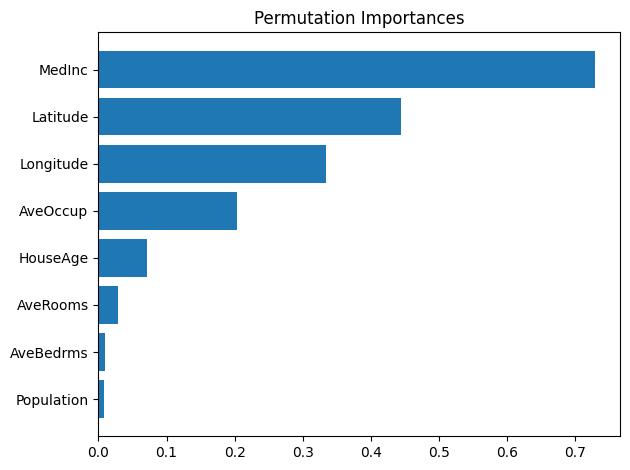

In [15]:
# Plot Permutation Feature Importances as a bar chart

sorted_idx = perm_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], perm_imp.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

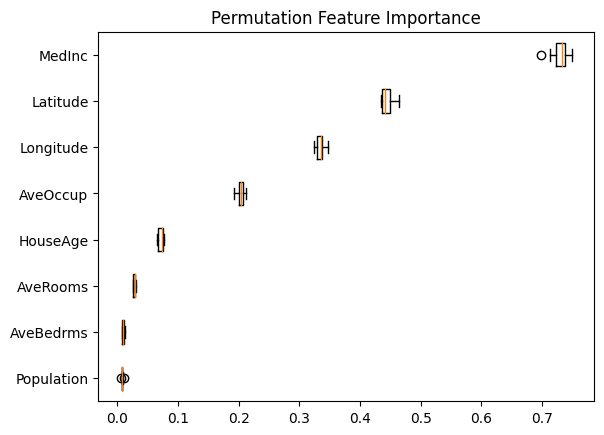

In [16]:
# Permutation Feature Importance
perm_importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importances.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_importances.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Feature Importance")
plt.show()

The feature importance shows that **Median Income** is the most significant predictor, followed by **Latitude** and **Longitude**. The significance of geographical location highlights the role of regional factors in determining house prices. Meanwhile, **Average Rooms** and **Bedrooms**, despite their correlation, have relatively low importance, suggesting that other features (like income and location) drive the price predictions more than house size.

# Model Performance

To evaluate the performance of your **Random Forest** model, we can compute **R² (coefficient of determination)** and **Mean Squared Error (MSE)** on the test set.

These metrics will provide a measure of how well the model generalizes:
- **R²** quantifies the proportion of variance in the target explained by the model (1 indicates perfect fit).
- **MSE** measures the average squared difference between predicted and actual values.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")

R²: 0.805
MSE: 0.255


The **Random Forest model** showed strong performance and reached the **R² value of 0.805**, which means that about 80.5% of housing price variability is explained by the model. With this, **MSE (Mean Squared Error) stands at 0.255**, therefore, there is a relatively low degree of error between the predicted and actual values, interpreted as usually accurate predictions by the model. Although the model demonstrates satisfactory performance, additional tuning and possible feature engineering should be investigated to enhance its accuracy, especially in terms of accounting for any remaining unexplained variance.

# Limitations and Future Works

1. **Feature Interactions**: Although the **ALE** plots account for interactions, we may need more sophisticated methods like **SHAP** to fully explore complex interactions between features like **Latitude** and **Longitude**.
2. **Model Interpretability**: While **Random Forest** provides feature importance insights, its complexity may still limit interpretability. Future work could explore simpler, inherently interpretable models (e.g., **linear models** or **decision trees**).
3. **Handling Correlated Features**: Feature correlations (e.g., between **AveRooms** and **AveBedrms**) may distort importance rankings. Future work could include **Principal Component Analysis (PCA)** to reduce multicollinearity.
4. **Data Exploration**: More feature engineering or domain-specific knowledge could further improve model accuracy. Additionally, the inclusion of external geographic or economic datasets might refine the predictions.

# Conclusion
Based on the relationship between the various features and house price using PDP, ICE ALE plots and permutation feature importance on the **California Housing dataset**, we would wish to highlight the following key messages:

The **median income** is again an important variable, as high-income levels bring about a higher price in housing, especially after exceeding a certain point.
While the **PDP** provides a smooth, general view, **ALE** focuses on local effects and **corrects for feature interactions**, making it much more fine-grained and thus easier to interpret.
**Feature correlation** analysis-for instance, the **AveRooms** and **AveBedrms**-require caution in interpretation since highly correlated features are hard to interpret.

Overall, explainability techniques using **PDPs** and **ALE** help explain global trends and local variations in model predictions, respectively. This offers a broad view of feature importance and interaction. These can then be used for decision-making to come up with more interpretable and hence more reliable machine learning models.

# References

- Google Colaboratory. (n.d.). Explainable AI - Global Explanations Notebook. Google Colab. https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=iR-WV8-fVkDS&uniqifier=1
- Google Colaboratory. (n.d.). Explainable AI - Local Explanations Notebook. Google Colab. https://colab.research.google.com/drive/1aBZSreILCbF3x7f5PIIlA3eNTmxoyzL7#scrollTo=ASXFH-S88xMp&uniqifier=1
